Data for this project was downloaded using Kaggle API. Following two line commands were used in command line interface. Note that only train.csv and structures.csv would be used in this project.
<img src="API_command.png">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
train = pd.read_csv('train.csv')
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [3]:
train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4659076 entries, 0 to 4659075
Data columns (total 6 columns):
id                          4659076 non-null int64
molecule_name               4659076 non-null object
atom_index_0                4659076 non-null int64
atom_index_1                4659076 non-null int64
type                        4659076 non-null object
scalar_coupling_constant    4659076 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 213.3+ MB


There is no null in the 'train' dataframe.

In [5]:
train.duplicated().any()

False
































There is no duplicated rows in train.


In [6]:
structures = pd.read_csv('structures.csv')
structures.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [7]:
structures.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358875 entries, 0 to 2358874
Data columns (total 6 columns):
molecule_name    2358875 non-null object
atom_index       2358875 non-null int64
atom             2358875 non-null object
x                2358875 non-null float64
y                2358875 non-null float64
z                2358875 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 108.0+ MB

































There is no null values in 'structures' dataframe.


In [8]:
structures.duplicated().any()

False

There is no duplicated rows in structures.

In [10]:
print('There are {} entries in train.csv'.format(len(train)))
print('There are {} different molecules in train.csv.'
      .format(train.molecule_name.nunique()))
print('There are {} different kinds of coupling types in train.csv.'
     .format(train.type.nunique()))
print('There are {} entried in structures.csv.'.format(len(structures)))
print('There are {} different molecules in structures.csv.'
      .format(structures.molecule_name.nunique()))
print('There are {} different kinds of atoms in structures.csv.'
     .format(structures.atom.nunique()))

There are 4659076 entries in train.csv
There are 85012 different molecules in train.csv.
There are 8 different kinds of coupling types in train.csv.
There are 2358875 entried in structures.csv.
There are 130789 different molecules in structures.csv.
There are 5 different kinds of atoms in structures.csv.


In [11]:
structures.atom.value_counts()

H    1208486
C     831809
O     183202
N     132382
F       2996
Name: atom, dtype: int64

In [13]:
structures['count_of_atoms'] = structures.groupby('molecule_name')['atom_index'].transform('count')
structures.head()

,molecule_name,atom_index,atom,x,y,z,count_of_atoms
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001,5
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976,5
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277,5
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644,5
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397,5


In [14]:
train['bond_length'] = train['type'].str[0]
train['atom_0'] = train['type'].str[2]
train['atom_1'] = train['type'].str[3]

train.head(10)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_0,atom_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,H,C
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2,H,H
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2,H,H
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2,H,H
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1,H,C
5,5,dsgdb9nsd_000001,2,3,2JHH,-11.2541,2,H,H
6,6,dsgdb9nsd_000001,2,4,2JHH,-11.2548,2,H,H
7,7,dsgdb9nsd_000001,3,0,1JHC,84.8093,1,H,C
8,8,dsgdb9nsd_000001,3,4,2JHH,-11.2543,2,H,H
9,9,dsgdb9nsd_000001,4,0,1JHC,84.8095,1,H,C


In [15]:
df = train.merge(structures, 
                 how='left', 
                 left_on=['molecule_name', 'atom_index_0', 'atom_0'], 
                 right_on=['molecule_name', 'atom_index', 'atom']).merge(structures, 
                 how='left', 
                 left_on=['molecule_name', 'atom_index_1', 'atom_1', 'count_of_atoms'], 
                 right_on=['molecule_name', 'atom_index', 'atom', 'count_of_atoms'], suffixes=['_0', '_1'])
df.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_0,atom_1,atom_index_0,atom_0,x_0,y_0,z_0,count_of_atoms,atom_index_1,atom_1,x_1,y_1,z_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,H,C,1,H,0.002150,-0.006031,0.001976,5,0,C,-0.012698,1.085804,0.008001
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2,H,H,1,H,0.002150,-0.006031,0.001976,5,2,H,1.011731,1.463751,0.000277
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2,H,H,1,H,0.002150,-0.006031,0.001976,5,3,H,-0.540815,1.447527,-0.876644
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2,H,H,1,H,0.002150,-0.006031,0.001976,5,4,H,-0.523814,1.437933,0.906397
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1,H,C,2,H,1.011731,1.463751,0.000277,5,0,C,-0.012698,1.085804,0.008001


In [18]:
final = df.loc[:, ~df.columns.duplicated()].set_index('id')
final.head()

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_0,atom_1,x_0,y_0,z_0,count_of_atoms,x_1,y_1,z_1
id,,,,,,,,,,,,,,,
0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,H,C,0.002150,-0.006031,0.001976,5,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2,H,H,0.002150,-0.006031,0.001976,5,1.011731,1.463751,0.000277
2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2,H,H,0.002150,-0.006031,0.001976,5,-0.540815,1.447527,-0.876644
3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2,H,H,0.002150,-0.006031,0.001976,5,-0.523814,1.437933,0.906397
4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1,H,C,1.011731,1.463751,0.000277,5,-0.012698,1.085804,0.008001


In [19]:
final.type = final['type'].astype('category')
final['bond_length'] = final['bond_length'].astype('int')
final['atom_0'] = final['atom_0'].astype('category')
final['atom_1'] = final['atom_1'].astype('category')
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4659076 entries, 0 to 4659075
Data columns (total 15 columns):
molecule_name               object
atom_index_0                int64
atom_index_1                int64
type                        category
scalar_coupling_constant    float64
bond_length                 int32
atom_0                      category
atom_1                      category
x_0                         float64
y_0                         float64
z_0                         float64
count_of_atoms              int64
x_1                         float64
y_1                         float64
z_1                         float64
dtypes: category(3), float64(7), int32(1), int64(3), object(1)
memory usage: 457.7+ MB


In [20]:
p0 = final[['x_0', 'y_0', 'z_0']].values 
p1 = final[['x_1', 'y_1', 'z_1']].values
final['distance'] = np.linalg.norm(p0 - p1, axis=1)
final.head()

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_0,atom_1,x_0,y_0,z_0,count_of_atoms,x_1,y_1,z_1,distance
id,,,,,,,,,,,,,,,,
0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,H,C,0.002150,-0.006031,0.001976,5,-0.012698,1.085804,0.008001,1.091953
1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2,H,H,0.002150,-0.006031,0.001976,5,1.011731,1.463751,0.000277,1.783120
2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2,H,H,0.002150,-0.006031,0.001976,5,-0.540815,1.447527,-0.876644,1.783147
3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2,H,H,0.002150,-0.006031,0.001976,5,-0.523814,1.437933,0.906397,1.783157
4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1,H,C,1.011731,1.463751,0.000277,5,-0.012698,1.085804,0.008001,1.091952

































ref https://www.kaggle.com/seriousran/just-speed-up-calculate-distance-from-benchmark to efficiently calculate distance between 2 points with cartesian coordinate values.


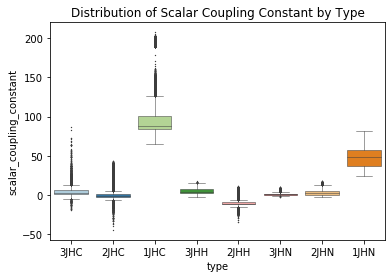

In [23]:
s1 = train.type.value_counts()
sns.boxplot(x='type',
            y='scalar_coupling_constant', 
            data=train,
            linewidth=0.5,
            fliersize=0.5,
            order=s1.index,
            palette='Paired')
plt.title('Distribution of Scalar Coupling Constant by Type')
plt.show()